### Import the required libraries

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import pandas as pd                                             # library for working with dataframes
import numpy as np                                              # library for working with arrays
import matplotlib.pyplot as plt                                 # low level visualization library
%matplotlib inline
import seaborn as sns                                           # higher level visualization library compared to matplotlib


#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [28]:
# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

### Read the data set from the given csv

In [29]:
# read the csv file into a dataframe
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

### Check the structure, columns, size , data type and for any NULL values

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Observed No NULL values and also no categorical coloumns

In [31]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


### Check unique value of each data type
### As all are numeric values and no categorical values, no need to create dummy variables

In [32]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Check the correlation between each variables
### Good correlation with Age vs Experience ( which is obvious)
### Good correlation with Personal Loan and Income
### Good correlation with Personal Loan and CCAvg
### Average correlation with Personal Loan and CD account

In [33]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.00,-0.01,-0.01,-0.02,0.01,-0.02,-0.02,0.02,-0.01,-0.02,-0.02,-0.01,-0.00,0.02
Age,-0.01,1.00,0.99,-0.06,-0.03,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,-0.01,0.99,1.00,-0.05,-0.03,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.02,-0.06,-0.05,1.00,-0.02,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
ZIP Code,0.01,-0.03,-0.03,-0.02,1.00,0.01,-0.00,-0.02,0.01,0.00,0.00,0.02,0.02,0.01
Family,-0.02,-0.05,-0.05,-0.16,0.01,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.02,-0.05,-0.05,0.65,-0.00,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.02,0.04,0.01,-0.19,-0.02,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,-0.01,0.21,0.01,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.02,-0.01,-0.01,0.50,0.00,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00


### Drop unwanted coloumns
#### ID is not required. Hence dropping for the regression analysis

In [34]:
cr_df = df.drop('ID', axis =1 ) # dropping ID column as it will be 1-1 mapping anyways
cr_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [35]:
cr_df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### Check Value Count of each variable and Study the same

In [49]:
for i in cr_df.columns:
    print(cr_df[i].value_counts())
    print()

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Ex

###  Observerd the expereience has negative value
### Assuming those are keyed in incorrectly, convert the column values to absolute values

In [50]:
cr_df['Experience']=cr_df['Experience'].abs()

In [51]:
cr_df['Experience']

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

In [52]:
print(cr_df['Experience'].value_counts())


32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
34    125
27    125
17    125
22    124
29    124
7     121
6     119
8     119
15    119
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64


In [53]:
cr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.13,11.42,0.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00
Securities Account,"5,000.00",0.10,0.31,0.00,0.00,0.00,0.00,1.00


### Check Statistics SUmmary to understand the Skewness.
### Mortgage has too much skewness as 70% has ZERO mortgage.
### Hence dropping this column from the analysis

In [54]:
cr_df['Mortgage'].value_counts(normalize=True)

0     0.69
98    0.00
103   0.00
119   0.00
83    0.00
91    0.00
89    0.00
90    0.00
102   0.00
78    0.00
118   0.00
101   0.00
87    0.00
94    0.00
131   0.00
104   0.00
109   0.00
106   0.00
116   0.00
144   0.00
112   0.00
81    0.00
185   0.00
76    0.00
120   0.00
97    0.00
121   0.00
100   0.00
158   0.00
184   0.00
95    0.00
111   0.00
86    0.00
137   0.00
79    0.00
84    0.00
153   0.00
115   0.00
161   0.00
82    0.00
135   0.00
151   0.00
117   0.00
113   0.00
142   0.00
108   0.00
149   0.00
166   0.00
159   0.00
88    0.00
167   0.00
123   0.00
221   0.00
128   0.00
146   0.00
148   0.00
110   0.00
138   0.00
170   0.00
174   0.00
122   0.00
75    0.00
218   0.00
194   0.00
114   0.00
147   0.00
157   0.00
105   0.00
169   0.00
207   0.00
205   0.00
132   0.00
140   0.00
164   0.00
204   0.00
249   0.00
129   0.00
126   0.00
219   0.00
154   0.00
124   0.00
85    0.00
96    0.00
80    0.00
196   0.00
230   0.00
229   0.00
127   0.00
193   0.00
107   0.00
251   0.00

In [55]:
cr_df.drop(['Mortgage'], axis=1, inplace=True)

In [56]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [57]:
cr_df['CCAvg'].value_counts(normalize=True)

0.30    0.05
1.00    0.05
0.20    0.04
2.00    0.04
0.80    0.04
0.10    0.04
0.40    0.04
1.50    0.04
0.70    0.03
0.50    0.03
1.70    0.03
1.80    0.03
1.40    0.03
2.20    0.03
1.30    0.03
0.60    0.02
2.80    0.02
2.50    0.02
0.90    0.02
0.00    0.02
1.90    0.02
1.60    0.02
2.10    0.02
2.40    0.02
2.60    0.02
1.10    0.02
1.20    0.01
2.70    0.01
2.30    0.01
2.90    0.01
3.00    0.01
3.30    0.01
3.80    0.01
3.40    0.01
2.67    0.01
4.00    0.01
4.50    0.01
3.90    0.01
3.60    0.01
4.30    0.01
6.00    0.01
3.70    0.01
4.70    0.00
3.20    0.00
4.10    0.00
4.90    0.00
3.10    0.00
6.50    0.00
5.00    0.00
5.40    0.00
0.67    0.00
2.33    0.00
1.67    0.00
4.40    0.00
5.20    0.00
3.50    0.00
6.90    0.00
7.00    0.00
6.10    0.00
4.60    0.00
7.20    0.00
5.70    0.00
7.40    0.00
6.30    0.00
7.50    0.00
8.00    0.00
4.20    0.00
6.33    0.00
6.80    0.00
8.10    0.00
7.30    0.00
0.75    0.00
1.75    0.00
6.67    0.00
4.33    0.00
7.60    0.00
6.70    0.00

### Model Building

In [61]:
## Define X and Y variables
X = cr_df.drop('Personal Loan', axis=1)
Y = cr_df[['Personal Loan']]

In [65]:
X

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,1,0,0,0
1,45,19,34,90089,3,1.50,1,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.90,3,0,0,1,0
4996,30,4,15,92037,4,0.40,1,0,0,1,0
4997,63,39,24,93023,2,0.30,3,0,0,0,0
4998,65,40,49,90034,3,0.50,2,0,0,1,0


In [66]:
Y

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [62]:
prop_Y = cr_df['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0   0.90
1   0.10
Name: Personal Loan, dtype: float64


In [63]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [64]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.124636
         Iterations 9


In [67]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.6018
Time:                        21:23:49   Log-Likelihood:                -436.23
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                4.662e-276
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.9005      4.975     -2.794      0.005     -23.651      -4.150
Age                   -0.0134      0.071     -0.190      0.849      -0.152       0.125
Experience          

###  R-Square is around 0.6 which is Best Fit

In [68]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_predict = logreg.predict(X_test)

In [70]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

### Check Training and Test accuracy. Calculate Recall, Precision, F1 Score , ROC AUC Score

Trainig accuracy 0.9071428571428571

Testing accuracy 0.9073333333333333

Confusion Matrix


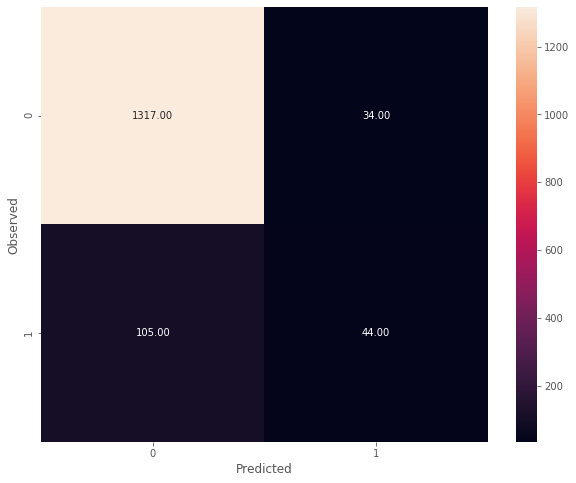

None

Recall: 0.2953020134228188

Precision: 0.5641025641025641

F1 Score: 0.3876651982378855

Roc Auc Score: 0.6350677350607802


In [71]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

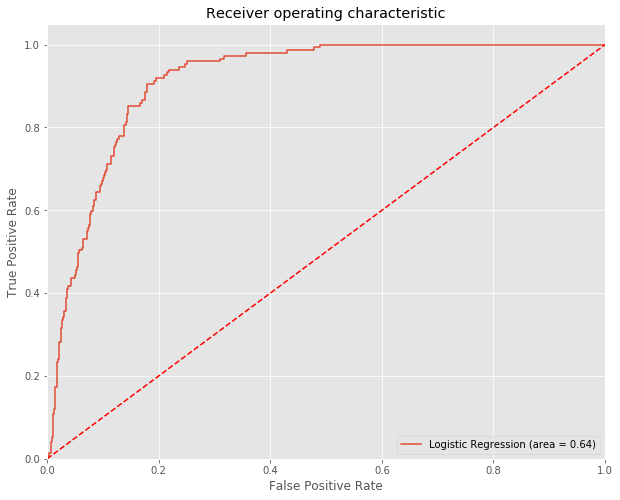

In [72]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Training Accuracy and Testing Accuracy is good which is more than 90%

### AUC Score is around 0.63 which is poor discrimination
### True positives is very less and Recall is 0.29 which is also very less


### So need more data points to decide whether Personal loan will be taken or not
